Your Task


1. Data Preparation:
Download and explore the Global Superstore Orders dataset.
Perform basic data cleaning and preprocessing.


2. Data Visualization with Plotly:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.


3. Data Visualization with Plotnine:
Use Plotnine to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


4. Comparative Analysis:
Compare the insights gained from Plotly and Plotnine visualizations.
Document your observations about the ease of use and effectiveness of both tools.


5. Code and Insights:
Write clear, well-documented Python code.
Include your analysis and insights as comments or markdown cells in your Jupyter notebook.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *

df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data for sales trends
sales_trends = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
sales_trends.rename(columns={'Order Date': 'Year'}, inplace=True)

# Aggregate sales by state
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
# Mapping of full state names to abbreviations
state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map full state names to abbreviations
sales_by_state['State'] = sales_by_state['State'].map(state_to_abbrev)


In [10]:
# line chart
fig_line = px.line(
    sales_trends,
    x='Year',
    y='Sales',
    title='Sales Trends Over the Years',
    labels={'Sales': 'Total Sales', 'Year': 'Year'},
    markers=True
)
fig_line.show()

In [20]:
# interactive map
fig_map_states = px.choropleth(
    sales_by_state,
    locations='State',
    locationmode='USA-states',
    color='Sales',
    title='Sales Distribution by State',
    # show only US map
    scope='usa',
    color_continuous_scale='Viridis',
    labels={'Sales': 'Total Sales'}
)
fig_map_states

In [21]:
top_products = (df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index())
profit_discount = df[['Profit', 'Discount']]

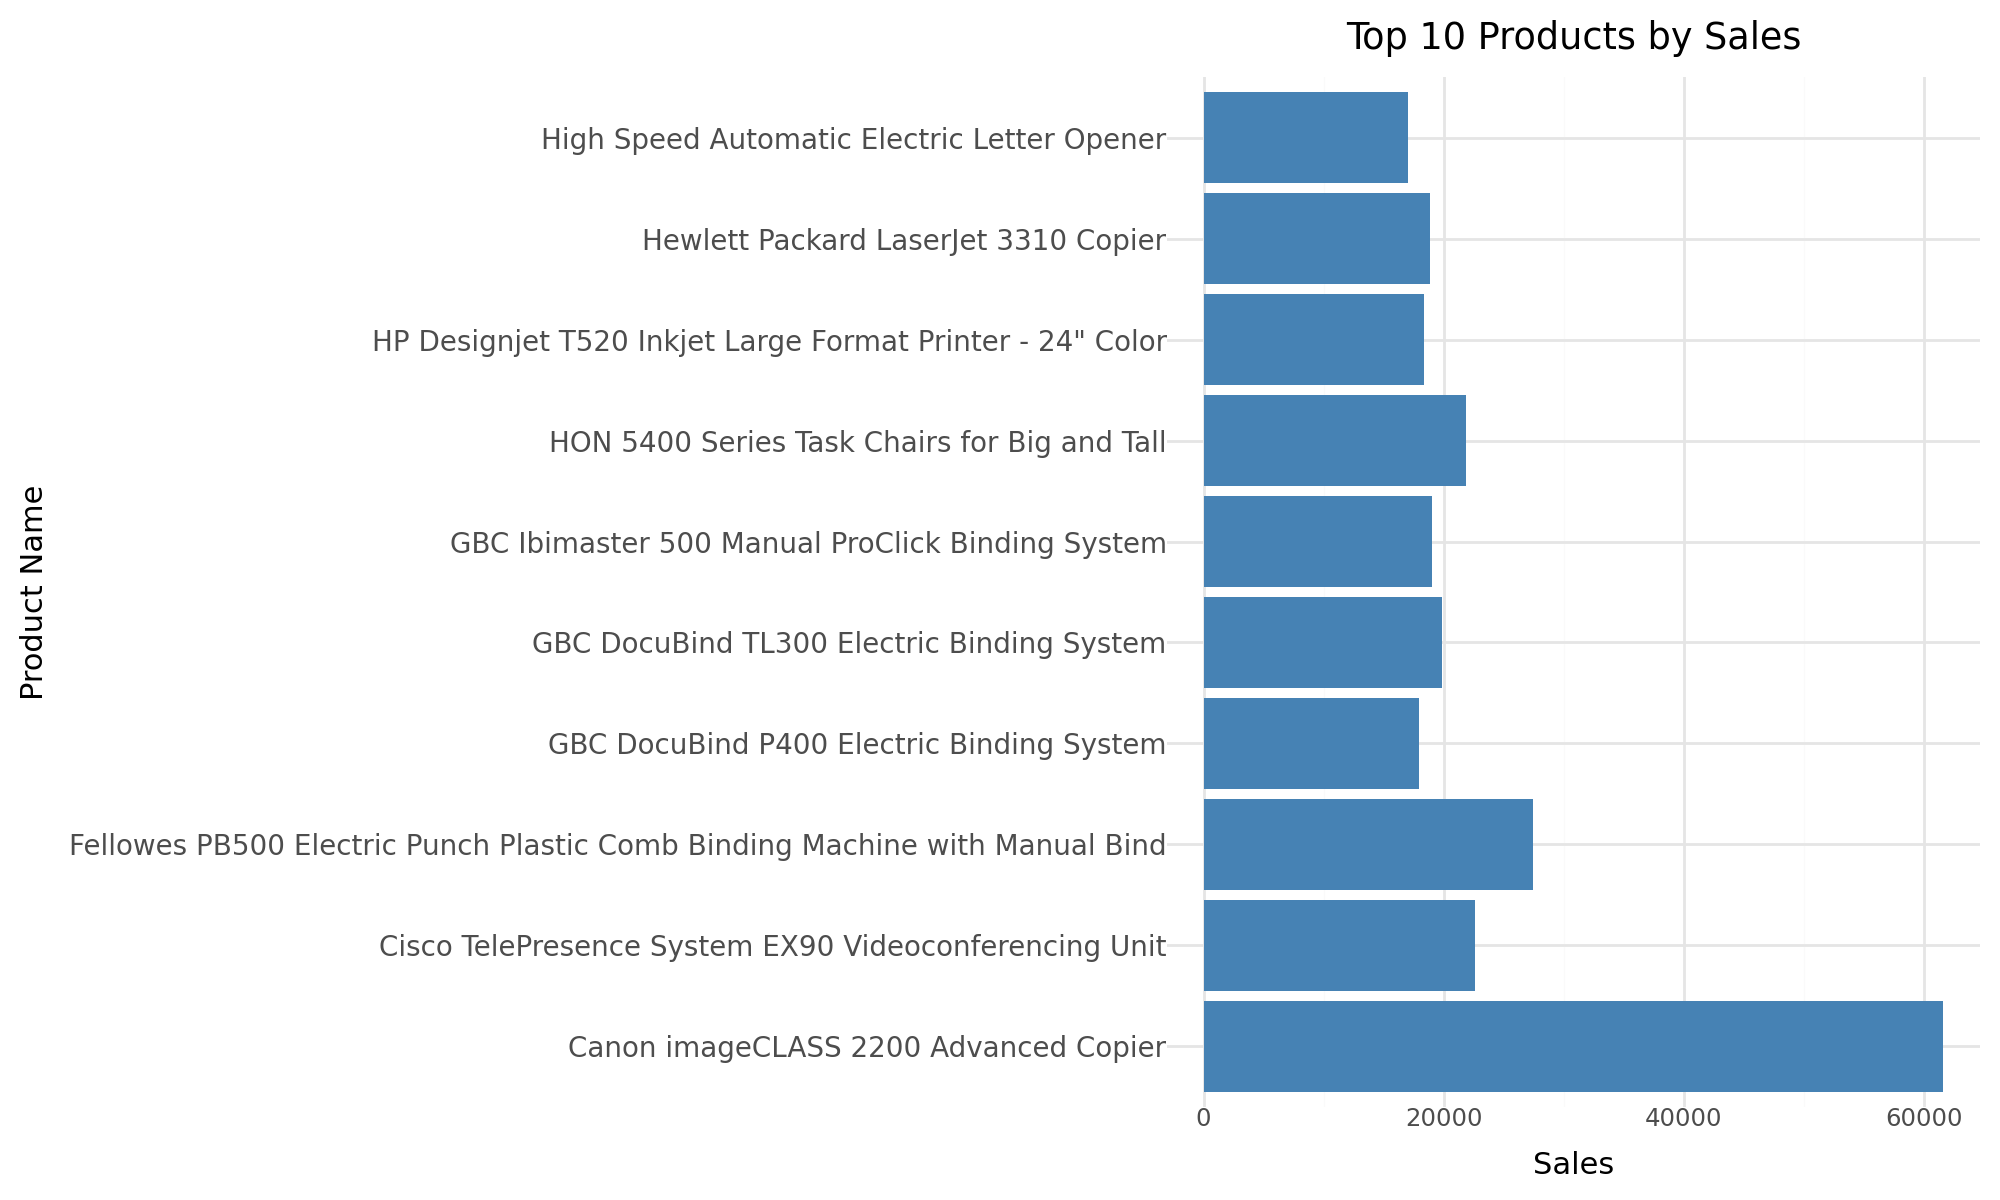

In [41]:
bar_chart = (
    ggplot(top_products, aes(x='Product Name', y='Sales')) +
    geom_bar(stat='identity', fill='steelblue') +
    coord_flip() +
    labs(
        title='Top 10 Products by Sales',
        x='Product Name',
        y='Sales'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        axis_text_y=element_text(size=10, ha='right')
    )
)

bar_chart

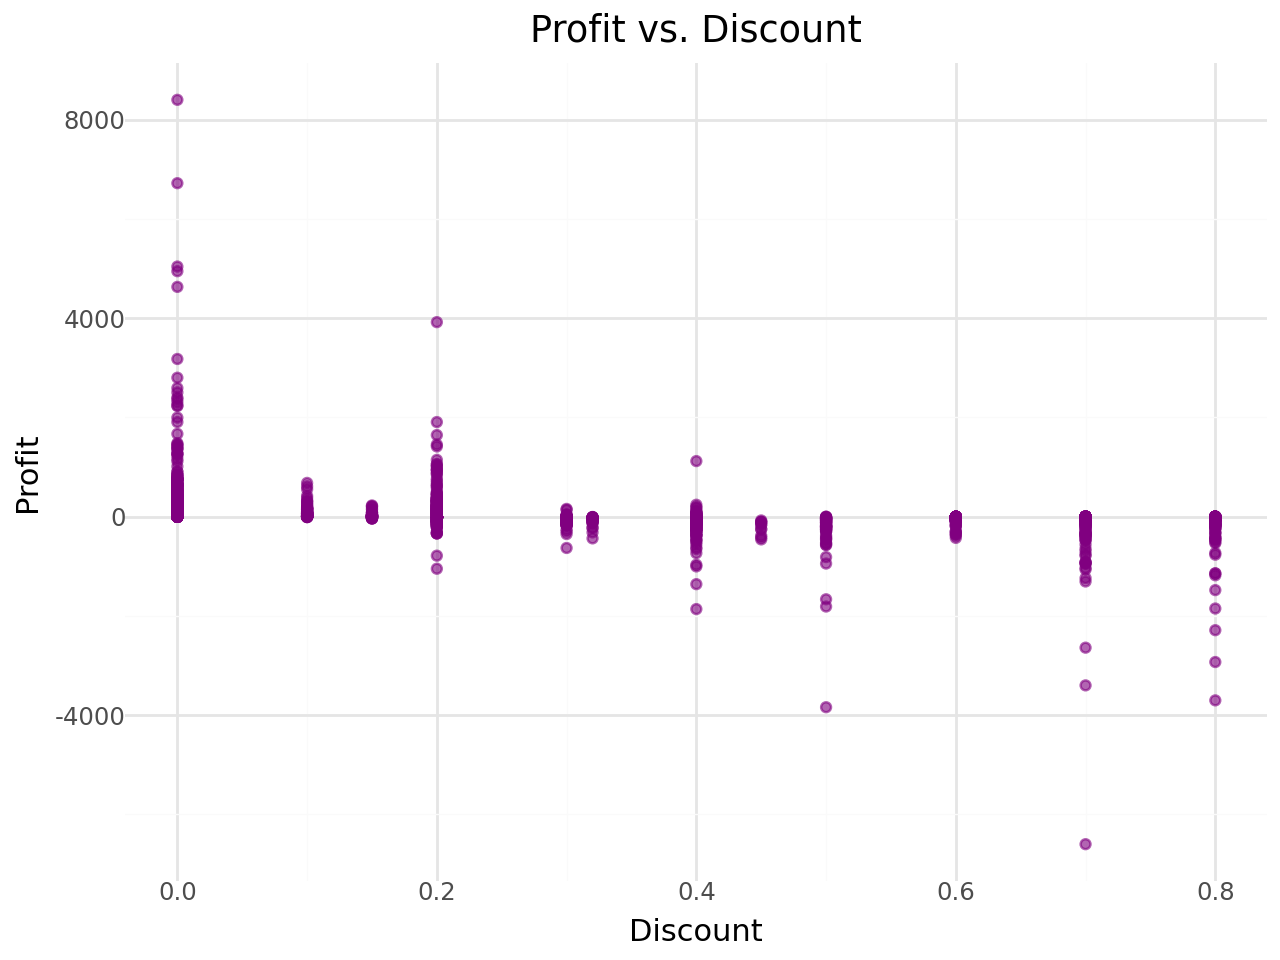

In [37]:
scatter_plot = (
    ggplot(profit_discount, aes(x='Discount', y='Profit')) +
    geom_point(alpha=0.6, color='purple') +
    labs(
        title='Profit vs. Discount',
        x='Discount',
        y='Profit'
    ) +
    theme_minimal()
)

scatter_plot

Sales grew since 2015
California is the best saling Statem followed by New York
Out of best saling products it would be Canon imageCLASS 2200 Advanced Copier
and we can clearly see that the higher discount is the lower our profits are

in terms of use I'd say that plotnine is easier as we only pass parametres without any additions
